# Исследование закономерностей, определяющих успешность игр,  для интернет-магазина "Стримчик"

**Описание данных:** из открытых источников доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).  
**Цель исследования:** выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

**План работы:**
- Изучение общей информации о данных;  
- Предобработка данных;   
- Исследовательский анализ данных: 
   - Сколько игр выпускалось в разные годы;
   - Как менялись продажи по платформам;
   - Какие платформы лидируют по продажам, растут или падают;
   - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
   - Изучение распределения игр по жанрам
- Определить для пользователя каждого региона (NA, EU, JP):
   - Самые популярные платформы (топ-5);
   - Самые популярные жанры (топ-5);
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе
- Проверка гипотез:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action и Sports разные.
- Финальные заключения.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('games.csv')

In [3]:
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первичный обзор данных:**  
Датасет о продажах игр состоит из 16715 строк и 11 столбцов. В датасете представлены исторические данные о продажах игр до 2016г, оценках пользователей и экспертов, жанрах и платформах.

В 6 из 11 столбцов есть пропуски - на следующем этапе пропуски будут проверены и по возможности обработаны. У столбцов по году выпуска и оценке пользователей будут заменены типы данных для дальнейшей корректной работы.

#### Шаг 2. Предобработка данных

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# Приведем названия столбцов к нижнему регистру

data = data.rename(columns = str.lower)
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Заменяем тип данных для года выпуска

data['year_of_release'] = data['year_of_release'].astype(pd.Int64Dtype())

In [7]:
percent_missing = data.isna().sum() / len(data) * 100
percent_missing

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Больше всего пропусков в данных по оценкам критиков и пользователей, и по рейтингу.

In [8]:
# Проверяем, какие значения входят в user_score

data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [9]:
print (data.query('user_score == "tbd"')['year_of_release'].min())
print (data.query('user_score == "tbd"')['year_of_release'].max())

1997
2016


Аббревиатура TBD (= to be determined) обычно используется в тех случаях, когда данные по рейтингу еще не доступны, но будут объявлены позже. Однако, в данном случае, можно отметить, что такой рейтинг встречался и в прошлые года (с 1997), поэтому предположим, что если в рейтинге игры стоит "tbd", то для такой игры рейтинг не планировалось собирать.


In [10]:
# Процент строк со значением tbd в user_score

print(len(data.query('user_score == "tbd"'))/len (data))

# Количество строк с нулевым рейтингом в user_score

print (len(data.query('user_score == "0"')))

0.1450194436135208
1


In [11]:
# Заменяем пустые строки и строки с tbd на значение 0 (предполагаем, что 0 будет означать отсутствие оценки)

data['user_score'].fillna('0', inplace=True)
data['user_score'].replace('tbd', '0', inplace=True)

In [12]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7'], dtype=object)

In [13]:
# Меняем формат данных для оценки пользователей

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


In [15]:
# Удалим из данных 2 строки с пропусками в наименовании, так как невозможно заполнить

data = data[data['name'].notnull()]

In [16]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,0.0,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,0.0,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [17]:
# Удалим из датасета 269 строк с пропусками в году выпуска, так как невозможно заполнить

data = data[data['year_of_release'].notnull()]

In [18]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [19]:
# Заменим пропуски в оценках критиков на нулевые значения (предполагаем, что 0 будет означать отсутствие оценки)

data['critic_score'].fillna(0, inplace=True)
data['critic_score'].sort_values().unique()

array([ 0., 13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98.])

In [20]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [21]:
# Рейтинг - категориальная переменная, поэтому заменим пропуски на "TBD" (предполагаем, что TBD - отсутствие рейтинга)

data['rating'].fillna('tbd', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [22]:
print ('Удалено', ((16715-16444)/ 16715)*100, '% от исходных данных')

Удалено 1.6212982351181575 % от исходных данных


In [23]:
# Добавим столбец с суммарными продажами по всем регионам

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data ['other_sales']

In [24]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


##### Предобработка данных - промежуточный итог

- Названия столбцов приведены к нижнему регистру.  
- Изменены типы для данных для года выпуска (с float64 на Int64) и для оценки пользователей (с object на float64) для дальнейшей корректной работы с данными.  
- Пропуски в наименовании имени и году выпуска не могут быть обработаны, строки с пропусками были удалены, что составило всего 1.6% от исходных данных.
- В данных по оценкам пользователей пропущенные значения и TBD были заменены на нулевые значения с предположением, что 0 - отсутствие оценки.  
- В данных по оценкам критиков пропущенные значения были заменены на нулевые значения с предположением, что 0 - отсутствие оценки.  
- В данных по рейтингу пропущенные значения были заменены на TBD, так как рейтинг - категориальная переменная. Предполагаем, что TBD - отсутствие рейтинга. 
- Добавлен столбец с суммарными продажами по всем регионам.  

#### Шаг 3. Исследовательский анализ данных

##### Cколько игр выпускалось в разные годы

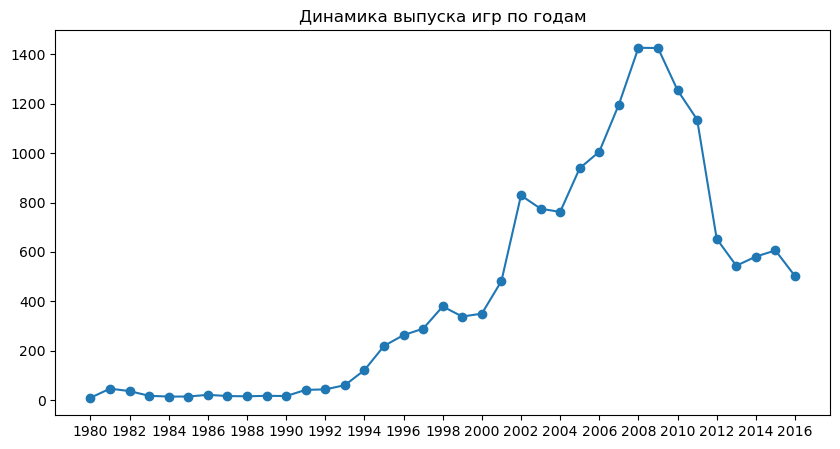

In [25]:
# Считаем количество уникальных значений и сортируем года по возрастанию
games_per_year = data['year_of_release'].value_counts().sort_index()

games_per_year.plot(
    style = 'o-',
    title = 'Динамика выпуска игр по годам',
    figsize = (10,5)
)
plt.xticks(range(1980, 2018,2))
plt.show()

**Вывод:**  
До 1994г количество новых игр было совсем небольшим. Первая волна роста наблюдается с 1994г по 2000г.  
Значительные изменения на игровом рынке начали происходить с 2000г. Можно отметить несколько "игровых бумов" - с 2000 по 2002г и с 2007 по 2009г. Однако, после 2009г количество новых игр пошло на спад и на момент 2014-2016 годов вернулось на уровень 2001г.

#####  Как менялись продажи по платформам

In [26]:
# Группируем данные по платформам и суммарным продажам
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбор платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(6).index
filtered_data = data[data['platform'].isin(top_platforms)]

# Группируем отфильтрованные данные по годам и суммарным продажам
yearly_platform_sales = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


In [27]:
platform_sales.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [28]:
yearly_platform_sales.head()

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN


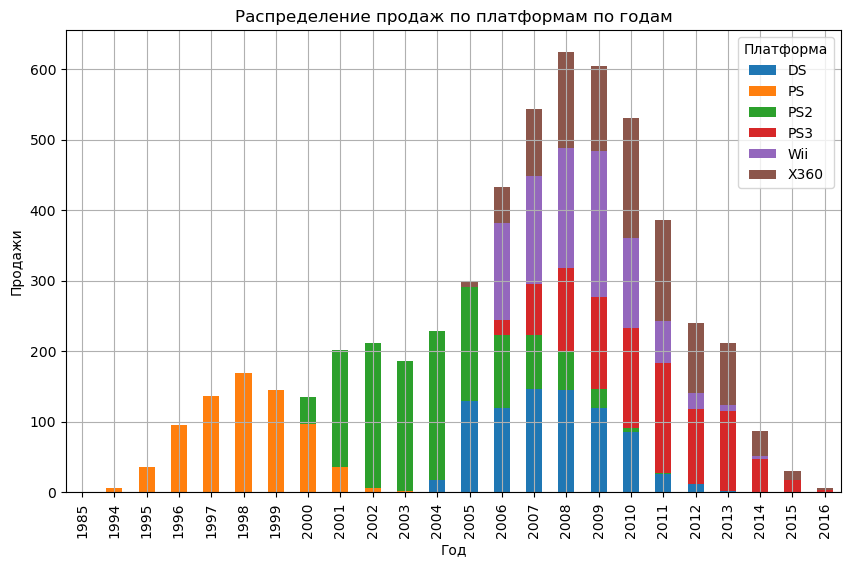

In [29]:
# Строим график для распределения суммарных продаж по годам и платформам

yearly_platform_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Распределение продаж по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend(title='Платформа')
plt.grid(True)

plt.show()

In [30]:
def find_lifetime(data):
    min_max_years = data.groupby('platform')['year_of_release'].agg(['min', 'max']).sort_values(by = 'min')
    min_max_years['lifetime'] = min_max_years['max'] - min_max_years['min']
    return min_max_years


min_max_years = find_lifetime(data)
display(min_max_years)

,min,max,lifetime
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1


In [31]:
min_max_years['lifetime'].describe()

count        31.0
mean     7.612903
std      6.998464
min           0.0
25%           3.0
50%           6.0
75%          10.0
max          31.0
Name: lifetime, dtype: Float64

**Вывод:**  
На графике отображены топ 6 платформ по суммарным продажам (DS, PS, PS2, PS3, Wii, X360): жизненный цикл каждой платформы составляет около 9-10 лет.  
Новая версия платформы запускается примерно каждые 5-6 лет, при этом предыдущая версия продолжает поддерживаться еще примерно такой же срок.  
Используя метод describe, проверяем результаты: средняя продолжительность - 6-7 лет, однако до 2000г было больше платформ с более коротким сроком жизни, также последние 5 платформ запустились в недавнем времени и могут немного занижать результат.

#####  Какие платформы лидируют по продажам, растут или падают?

Учитывая продолжительность жизни платформы, возьмем 5 платформ, которые запустились после 2010г и PC, которая используется до сих пор.

In [32]:
platform_list = ['3DS', 'PSV', 'WiiU', 'PS4', 'XOne', 'PC']
data_actual = data[data['platform'].isin(platform_list) & (data['year_of_release'] >= 2011)]

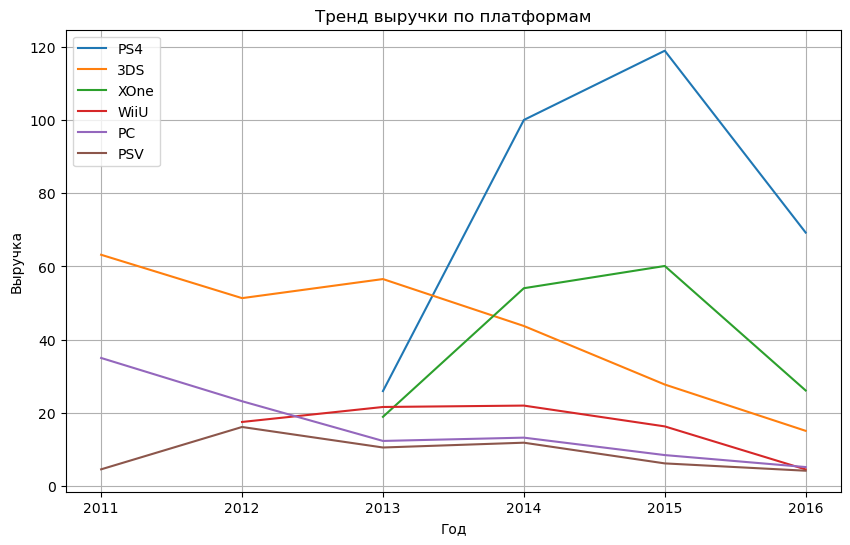

In [33]:
# Список уникальных платформ
platforms = data_actual['platform'].unique()  

plt.figure(figsize=(10, 6))  

for platform in platforms:
    # Фильтрация данных для платформы
    platform_data = data_actual[data_actual['platform'] == platform]
    
    # Группировка данных по году и суммирование выручки для каждого года
    revenue_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    
    # Построение графика для платформы
    revenue_by_year.plot(label=platform)

plt.xlabel('Год')
plt.ylabel('Выручка')
plt.title('Тренд выручки по платформам')
plt.legend()
plt.grid()

plt.show()

**Вывод:**  
Можно отметить нисходящий тренд выручки по платформам.  
На 2016г лидирующая платформа - PS4, затем - XOne и 3DS.  
У трех платформ WiiU, PC, PSV продажи на 2016г находятся на одном уровне. Также, учитывая тот факт, что они запустились ранее, потенциально прибыльными платформами можно назвать PS4 и XOne.

##### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

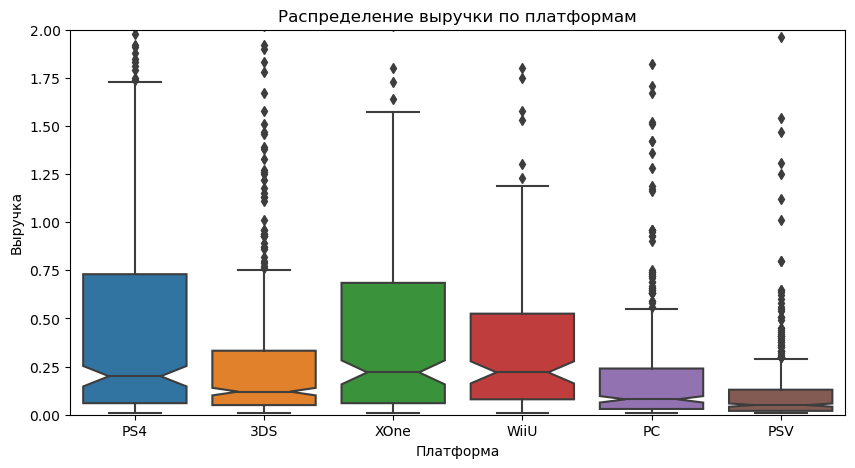

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_actual['platform'], y=data_actual['total_sales'], notch=True)

plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.title('Распределение выручки по платформам')
plt.ylim (0,2)

plt.show()

**Вывод:**  
- Медианные значения у PS4, XOne, WiiU находятся примерно на одном уровне и они выше, чем у платформ 3DS, PC, PSV.  
- 3й квартиль выше у платформ PS4 и XOne.  
- Самые низкие значения у платформы PSV.  
- Больше всего выбросов у платформы 3DS, меньше всего - у WiiU. 


#####  Влияние отзывов пользователей и критиков на продажи внутри популярных платформ

Рассмотрим топ-3 популярные платформы - PS4, XOne, 3DS

In [35]:
# Для оценки уберем строки, где оценки критиков и пользователей равны 0 (те отсутствуют)

data_ps4 = data_actual.query('platform == "PS4" and critic_score >0 and user_score > 0')
display(data_ps4.info())

data_xone = data_actual.query('platform == "XOne" and critic_score >0 and user_score > 0')
display(data_xone.info())

data_3ds = data_actual.query('platform == "3DS" and critic_score >0 and user_score > 0')
display(data_3ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             249 non-null    object 
 1   platform         249 non-null    object 
 2   year_of_release  249 non-null    Int64  
 3   genre            249 non-null    object 
 4   na_sales         249 non-null    float64
 5   eu_sales         249 non-null    float64
 6   jp_sales         249 non-null    float64
 7   other_sales      249 non-null    float64
 8   critic_score     249 non-null    float64
 9   user_score       249 non-null    float64
 10  rating           249 non-null    object 
 11  total_sales      249 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 25.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             165 non-null    object 
 1   platform         165 non-null    object 
 2   year_of_release  165 non-null    Int64  
 3   genre            165 non-null    object 
 4   na_sales         165 non-null    float64
 5   eu_sales         165 non-null    float64
 6   jp_sales         165 non-null    float64
 7   other_sales      165 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           165 non-null    object 
 11  total_sales      165 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 16.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 40 to 16143
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             156 non-null    object 
 1   platform         156 non-null    object 
 2   year_of_release  156 non-null    Int64  
 3   genre            156 non-null    object 
 4   na_sales         156 non-null    float64
 5   eu_sales         156 non-null    float64
 6   jp_sales         156 non-null    float64
 7   other_sales      156 non-null    float64
 8   critic_score     156 non-null    float64
 9   user_score       156 non-null    float64
 10  rating           156 non-null    object 
 11  total_sales      156 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 16.0+ KB


None

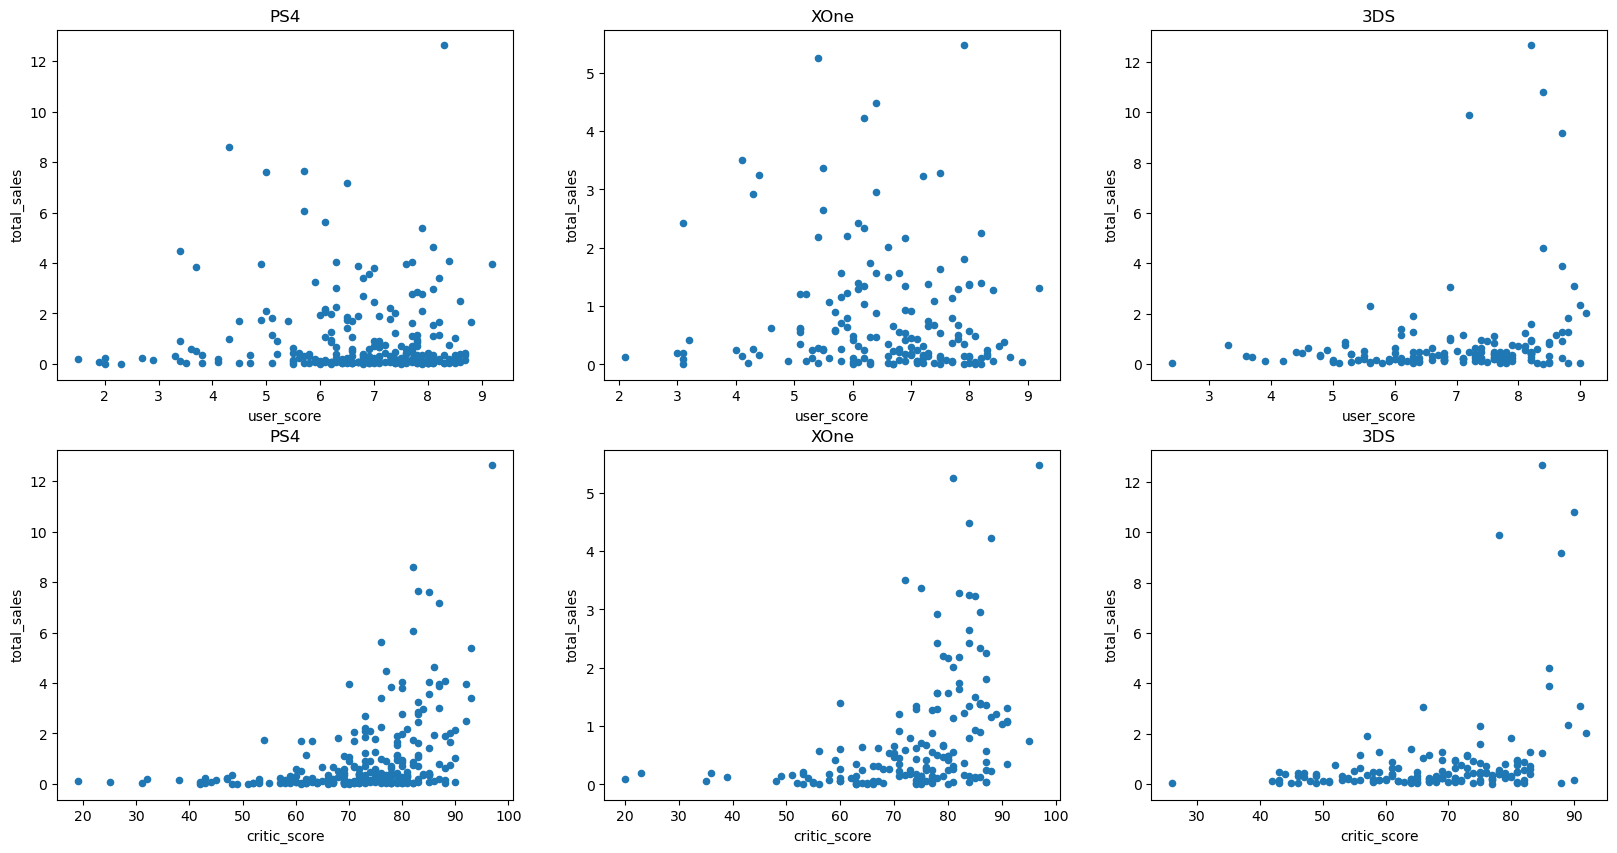

In [36]:
fig, axes = plt.subplots (nrows = 2, ncols = 3, figsize = (20,10))

data_ps4.plot(x='user_score',y='total_sales',kind='scatter', title = 'PS4', ax = axes[0,0])
data_ps4.plot(x='critic_score',y='total_sales',kind='scatter', title = 'PS4', ax = axes[1,0])

data_xone.plot(x='user_score',y='total_sales',kind='scatter', title = 'XOne', ax = axes[0,1])
data_xone.plot(x='critic_score',y='total_sales',kind='scatter', title = 'XOne', ax = axes[1,1])

data_3ds.plot(x='user_score',y='total_sales',kind='scatter', title = '3DS', ax = axes[0,2])
data_3ds.plot(x='critic_score',y='total_sales',kind='scatter', title = '3DS', ax = axes[1,2])


plt.show()

In [37]:
print('PS4: корреляция между оценкой пользователей и продажами равна',
      data_ps4['user_score'].corr(data_ps4['total_sales']))
print('XOne: корреляция между оценкой пользователей и продажами равна',
      data_xone['user_score'].corr(data_xone['total_sales']))
print('3DS: корреляция между оценкой пользователей и продажами равна',
      data_3ds['user_score'].corr(data_3ds['total_sales']))  
print ()

print('PS4: корреляция между оценкой критиков и продажами равна',
      data_ps4['critic_score'].corr(data_ps4['total_sales']))
print('XOne: корреляция между оценкой критиков и продажами равна',
      data_xone['critic_score'].corr(data_xone['total_sales']))
print('3DS: корреляция между оценкой критиков и продажами равна',
      data_3ds['critic_score'].corr(data_3ds['total_sales']))

PS4: корреляция между оценкой пользователей и продажами равна -0.03362497596528883
XOne: корреляция между оценкой пользователей и продажами равна -0.09400318326920862
3DS: корреляция между оценкой пользователей и продажами равна 0.23208872237663591

PS4: корреляция между оценкой критиков и продажами равна 0.4058948014583661
XOne: корреляция между оценкой критиков и продажами равна 0.4104220356129637
3DS: корреляция между оценкой критиков и продажами равна 0.33890386446332127


**Вывод:**  
Оценки пользователей и критиков по-разному влияют на продажи:  
- Корреляция между оценкой пользователей и продажами для трех платформ очень слабая.
- Корреляция между оценкой критиков и продажами для трех платформ слабая.
Оценка критиков сильнее влияет на продажи на платформах, чем оценка пользователей.  
- Также можно отметить, что у 3DS значения корреляции по оценкам пользователей и критиков довольно близки, в то время как для PS4 и XOne они сильно отличаются.

##### Распределение игр по жанрам

In [38]:
mean_sales_genre = data_actual.groupby('genre')['total_sales'].mean().sort_values()

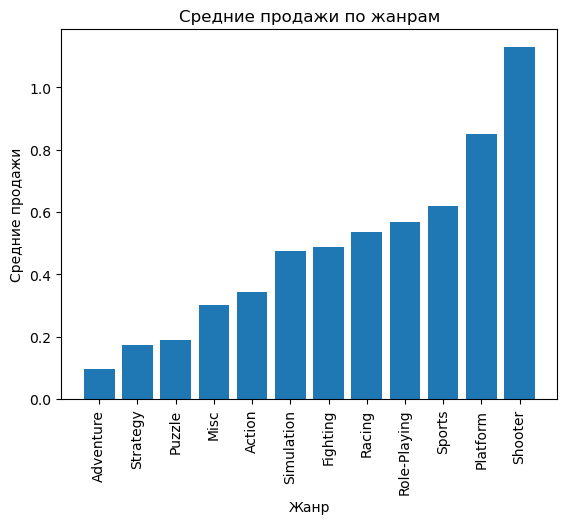

In [39]:
plt.bar(mean_sales_genre.index, mean_sales_genre.values)
plt.xlabel('Жанр')
plt.ylabel('Средние продажи')
plt.title('Средние продажи по жанрам')
plt.xticks(rotation=90)  
plt.show()

**Вывод:**  
Жанры с наименьшими средними продажами - Puzzle, Strategy и Adventure.  
У жанров Simulation, Fighting, Racing, Role-Playing, Sports значения средних продаж достаточно близки.  
Самые высокие средние продажи у жанров Shooter и Platform. 

##### Промежуточный вывод:

**1) Динамика выпуска игр по годам**  
До 1994г количество новых игр было совсем небольшим. Рост наблюдается с 1994г со всплесками - с 2000 по 2002г и с 2007 по 2009г. После 2009г количество новых игр пошло на спад.

**2) Как менялись продажи по платформам**  
Жизненный цикл каждой платформы составляет около 7 лет.
Новая версия платформы запускается примерно каждые 5-6 лет, при этом предыдущая версия продолжает поддерживаться еще примерно такой же срок.

**3) Какие платформы лидируют по продажам**  
Наблюдается нисходящий тренд выручки по платформам. На 2016г лидирующая платформа - PS4, затем - XOne и 3DS.

**4) Распределение выручки по платформам**  
График ящик с усами подтверждает лидеров в платформах - PS4, XOne. У WiiU значения медианы и квартилей выше, чем у 3DS, однако у последней наблюдается больше выбросов.

**5) Влияние отзывов пользователей и критиков на продажи внутри популярных платформ**  
Оценка критиков (слабая корреляция) сильнее влияет на продажи на платформах, чем оценка пользователей (очень слабая корреляция).
У 3DS значения корреляции по оценкам пользователей и критиков довольно близки, в то время как для PS4 и XOne они сильно отличаются.

**6) Распределение игр по жанрам**  
Жанры с наименьшими средними продажами - Puzzle, Strategy и Adventure.
У жанров Simulation, Fighting, Racing, Role-Playing, Sports значения средних продаж достаточно близки.
Самые высокие средние продажи у жанров Shooter и Platform.

#### Шаг 4. Составьте портрет пользователя каждого региона

##### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [40]:
na_top_platforms = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_top_platforms = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_top_platforms = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

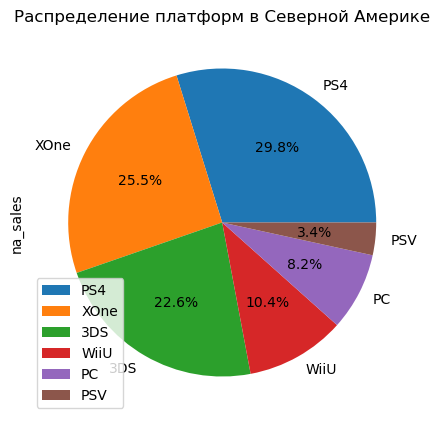

platform
PS4     108.74
XOne     93.12
3DS      82.65
WiiU     38.10
PC       29.88
PSV      12.47
Name: na_sales, dtype: float64

In [41]:
na_top_platforms.plot(
    kind='pie',
    figsize = (5,5),
    legend = True,
    autopct='%.1f%%',
    title = 'Распределение платформ в Северной Америке'
)

plt.show()
display(na_top_platforms)

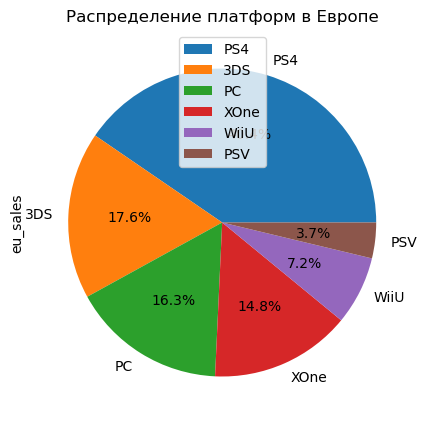

platform
PS4     141.09
3DS      61.27
PC       56.70
XOne     51.59
WiiU     25.13
PSV      13.07
Name: eu_sales, dtype: float64

In [42]:
eu_top_platforms.plot(
    kind='pie',
    figsize = (5,5),
    legend = True,
    autopct='%.1f%%',
    title = 'Распределение платформ в Европе'
)

plt.show()
display(eu_top_platforms)

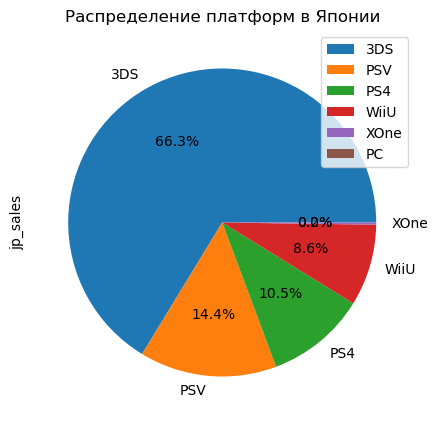

platform
3DS     100.62
PSV      21.84
PS4      15.96
WiiU     13.01
XOne      0.34
PC        0.00
Name: jp_sales, dtype: float64

In [43]:
jp_top_platforms.plot(
    kind='pie',
    figsize = (5,5),
    legend = True,
    autopct='%.1f%%',
    title = 'Распределение платформ в Японии'
)

plt.show()
display(jp_top_platforms)

In [44]:
platform_share_region = data_actual.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales','jp_sales'],
    aggfunc = 'sum')

platform_share_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.27,100.62,82.65
PC,56.70,0.00,29.88
PS4,141.09,15.96,108.74
PSV,13.07,21.84,12.47
WiiU,25.13,13.01,38.10
XOne,51.59,0.34,93.12


In [45]:
def calculate_percent(row):
    total = row.sum()
    return row / total

platform_share_region_percent = platform_share_region.apply(calculate_percent, axis=1)

print('Доля продаж платформ по регионам')
display(platform_share_region_percent)

Доля продаж платформ по регионам


,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.250552,0.411466,0.337982
PC,0.654886,0.000000,0.345114
PS4,0.530833,0.060047,0.409120
PSV,0.275855,0.460954,0.263191
WiiU,0.329617,0.170645,0.499738
XOne,0.355670,0.002344,0.641986


**Вывод:**  
В Северной Америке и Европе топ-5 платформ совпадают: это PS4, XOne, 3DS, WiiU и PC c лидером PS4.  
В Японии есть отличия: в топ-5 попадает PSV вместо XOne и PC. Лидером является 3DS - 66% рынка, что в 3 раза больше, чем на рынках Америки и Европы.

Оценивая долю продаж каждой платформы по регионам, можно отметить, что в процентном соотношение PS4 намного популярнее в Америке и Европе, чем в Японии. У PC основной рынок - Европа (65%), у XOne -  Северная Америка (64%).

##### Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [46]:
na_top_genre = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_top_genre = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_top_genre = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

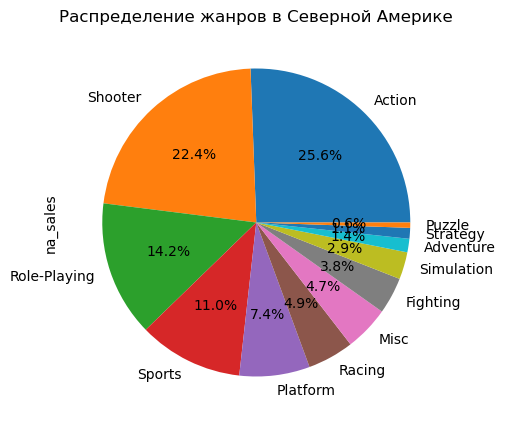

genre
Action          93.41
Shooter         81.82
Role-Playing    52.00
Sports          40.04
Platform        26.97
Racing          17.72
Misc            17.18
Fighting        14.05
Simulation      10.43
Adventure        5.17
Strategy         4.14
Puzzle           2.03
Name: na_sales, dtype: float64

In [47]:
na_top_genre.plot(
    kind='pie',
    figsize = (5,5),
    autopct='%.1f%%',
    title = 'Распределение жанров в Северной Америке'
)

plt.show()
display(na_top_genre)

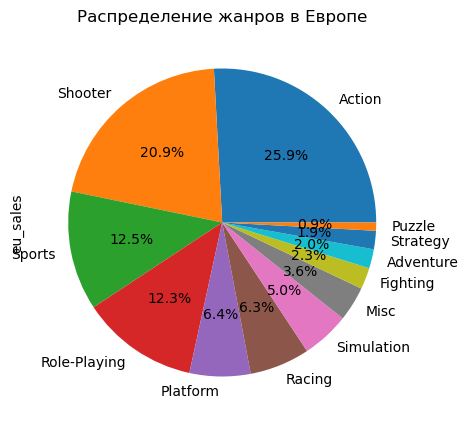

genre
Action          90.21
Shooter         72.92
Sports          43.66
Role-Playing    42.91
Platform        22.30
Racing          22.04
Simulation      17.50
Misc            12.70
Fighting         7.87
Adventure        7.01
Strategy         6.73
Puzzle           3.00
Name: eu_sales, dtype: float64

In [48]:
eu_top_genre.plot(
    kind='pie',
    figsize = (5,5),
    autopct='%.1f%%',
    title = 'Распределение жанров в Европе'
)

plt.show()
display(eu_top_genre)

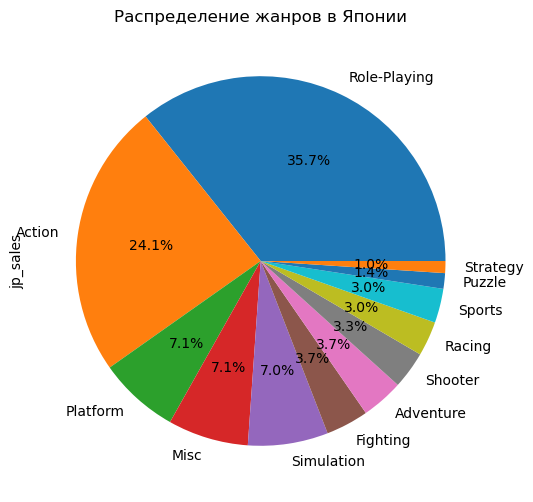

genre
Role-Playing    54.19
Action          36.54
Platform        10.71
Misc            10.70
Simulation      10.64
Fighting         5.67
Adventure        5.57
Shooter          4.95
Racing           4.60
Sports           4.54
Puzzle           2.07
Strategy         1.59
Name: jp_sales, dtype: float64

In [49]:
jp_top_genre.plot(
    kind='pie',
    figsize = (6,6),
    autopct='%.1f%%',
    title = 'Распределение жанров в Японии'
)

plt.show()
display(jp_top_genre)

In [50]:
genre_share_region = data_actual.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales','jp_sales'],
    aggfunc = 'sum')

genre_share_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,90.21,36.54,93.41
Adventure,7.01,5.57,5.17
Fighting,7.87,5.67,14.05
Misc,12.70,10.70,17.18
Platform,22.30,10.71,26.97
Puzzle,3.00,2.07,2.03
Racing,22.04,4.60,17.72
Role-Playing,42.91,54.19,52.00
Shooter,72.92,4.95,81.82


In [51]:
def calculate_percent_genre(row):
    total = row.sum()
    return row / total

genre_share_region_percent = genre_share_region.apply(calculate_percent_genre, axis=1)

print('Доля продаж жанров по регионам')
display(genre_share_region_percent)

Доля продаж жанров по регионам


,eu_sales,jp_sales,na_sales
genre,,,
Action,0.409747,0.165970,0.424282
Adventure,0.394930,0.313803,0.291268
Fighting,0.285248,0.205509,0.509242
Misc,0.312962,0.263677,0.423361
Platform,0.371791,0.178560,0.449650
Puzzle,0.422535,0.291549,0.285915
Racing,0.496844,0.103697,0.399459
Role-Playing,0.287793,0.363447,0.348759
Shooter,0.456635,0.030998,0.512368


**Вывод:**  
Топ 5 жанров в Америке и Европе: Action, Shooter, Role-Playing, Sports, Platform  
Топ 5 жанров в Японии: Role-Playing, Action, Platform, Misc, Simulation  
Оценивая долю продаж жанров по регионам, можно отметить, что Shooter и Sports почти не присутствуют в Японии.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?


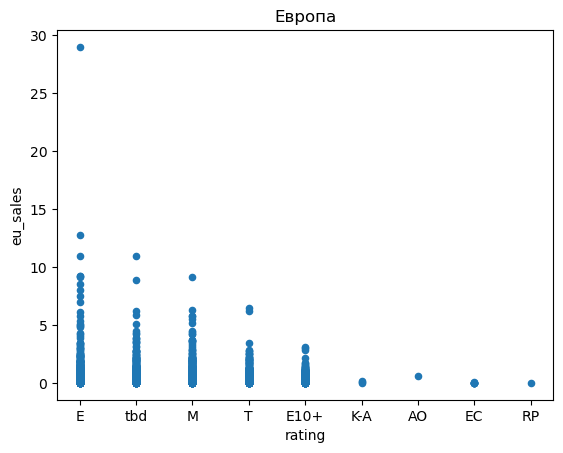

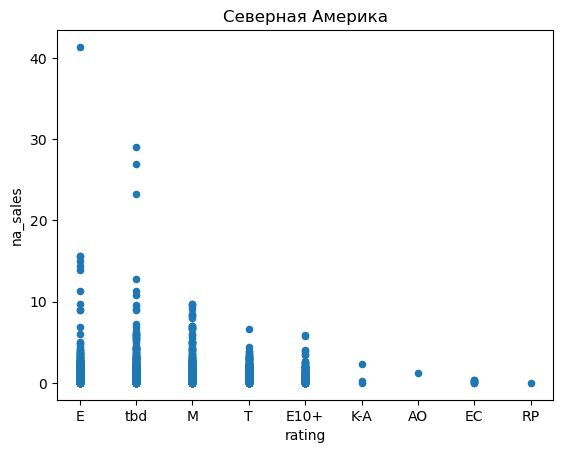

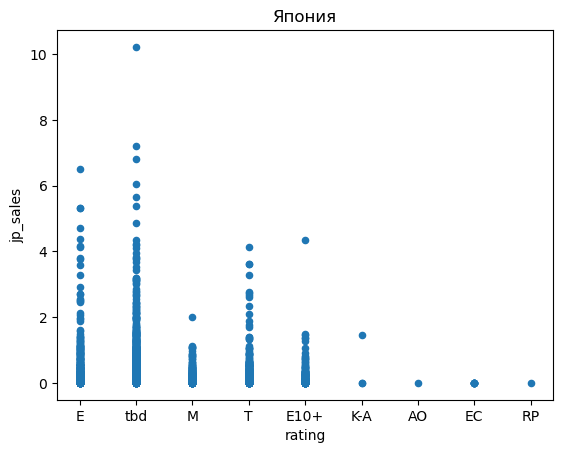

In [52]:
data.plot(x = 'rating', y = 'eu_sales', kind = 'scatter', title = 'Европа')
data.plot(x = 'rating', y = 'na_sales', kind = 'scatter', title = 'Северная Америка')
data.plot(x = 'rating', y = 'jp_sales', kind = 'scatter', title = 'Япония')

plt.show()

**Вывод:**  
Согласно ESRB, рейтинги означают:  
E - для всех  
E 10+ - для лиц от 10 лет  
M - для взрослых  
T - для подростков  
AO - 18+  
KA - 6+  
EC - для детей младшего возраста  
RP - рейтинг ожидается  

Меньше продаж наблюдается у игр с рейтингами KA, AO, EC, RP, больше продаж - у E, M, T, E10+.  
В Японии наблюдается отличие у игр с "tbd" (рейтинг отсутствует), можно предположить, что в Японии рейтинг меньше влияет на продажи.

##### Промежуточный вывод:

Топ жанры и платформы в Северной Америке и Европе совпадают, отличия наблюдаются в Японии.  

В Северной Америке и Европе топ-5 платформ: PS4, XOne, 3DS, WiiU и PC c лидером PS4. В Японии в топ-5 попадает PSV вместо XOne и PC, лидером является 3DS - 66% рынка.  

Топ 5 жанров в Америке и Европе: Action, Shooter, Role-Playing, Sports, Platform. Топ 5 жанров в Японии: Role-Playing, Action, Platform, Misc, Simulation.  

Меньше продаж наблюдается у игр с рейтингами KA, AO, EC, RP, больше продаж - у E, M, T, E10+.
В Японии наблюдается отличие у игр с "tbd" (рейтинг отсутствует), можно предположить, что в Японии рейтинг меньше влияет на продажи.


#### Шаг 5. Проверьте гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны  
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны  
Установим пороговое значение alpha в 5 %

In [53]:
sample_XOne = data_actual.query('platform == "XOne" and user_score > 0')
sample_PC = data_actual.query('platform == "PC" and user_score > 0')

In [54]:
alpha = 0.05 

results = st.ttest_ind(sample_XOne['user_score'], sample_PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Нельзя утверждать о том, что средние пользовательские рейтинги платформ Xbox One и PC не равны.

##### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports  равны  
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны  
Установим пороговое значение alpha в 5 %

In [55]:
sample_action = data_actual.query('genre == "Action" and user_score > 0')
sample_sports = data_actual.query('genre == "Sports" and user_score > 0')

In [56]:
alpha = 0.05 

results = st.ttest_ind(sample_action['user_score'], sample_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.7279566072817166e-13
Отвергаем нулевую гипотезу


**Вывод:**  
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги жанров Action и Sports не равны

##### Результаты

Первая гипотеза: нельзя утверждать о том, что средние пользовательские рейтинги платформ Xbox One и PC не равны.  
Вторая гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

#### Шаг 6. Вывод

Описание данных: из открытых источников доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

В процессе предобработки данных была проведена следующая работа:  
- Названия столбцов приведены к нижнему регистру.  
- Изменены типы для данных для года выпуска (с float64 на Int64) и для оценки пользователей (с object на float64) для дальнейшей корректной работы с данными.  
- Пропуски в наименовании имени и году выпуска не могут быть обработаны, строки с пропусками были удалены, что составило всего 1.6% от исходных данных.
- В данных по оценкам пользователей пропущенные значения и TBD были заменены на нулевые значения с предположением, что 0 - отсутствие оценки.  
- В данных по оценкам критиков пропущенные значения были заменены на нулевые значения с предположением, что 0 - отсутствие оценки.  
- В данных по рейтингу пропущенные значения были заменены на TBD, так как рейтинг - категориальная переменная. Предполагаем, что TBD - отсутствие рейтинга. 
- Добавлен столбец с суммарными продажами по всем регионам.  

В процессе исследовательского анализа выявлены следующие результаты:  
1) Динамика выпуска игр по годам  
До 1994г количество новых игр было совсем небольшим. Первая волна роста наблюдается с 1994г по 2000г.
Значительные изменения на игровом рынке начали происходить с 2000г. Можно отметить несколько "игровых бумов" - с 2000 по 2002г и с 2007 по 2009г. Однако, после 2009г количество новых игр пошло на спад и на момент 2014-2016 годов вернулось на уровень 2001г.

2) Как менялись продажи по платформам  
Жизненный цикл каждой платформы составляет около 7 лет.
Новая версия платформы запускается примерно каждые 5-6 лет, при этом предыдущая версия продолжает поддерживаться еще примерно такой же срок.

3) Какие платформы лидируют по продажам  
Наблюдается нисходящий тренд выручки по платформам. На 2016г лидирующая платформа - PS4, затем - XOne и 3DS.

4) Распределение выручки по платформам  
График ящик с усами подтверждает лидеров в платформах - PS4, XOne. У WiiU значения медианы и квартилей выше, чем у 3DS, однако у последней наблюдается больше выбросов.

5) Влияние отзывов пользователей и критиков на продажи внутри популярных платформ  
Оценка критиков (слабая корреляция) сильнее влияет на продажи на платформах, чем оценка пользователей (очень слабая корреляция).
У 3DS значения корреляции по оценкам пользователей и критиков довольно близки, в то время как для PS4 и XOne они сильно отличаются.

6) Распределение игр по жанрам  
Жанры с наименьшими средними продажами - Puzzle, Strategy и Adventure.
У жанров Simulation, Fighting, Racing, Role-Playing, Sports значения средних продаж достаточно близки.
Самые высокие средние продажи у жанров Shooter и Platform.

Был составлен портрет пользователей по регионам:  

Топ жанры и платформы в Северной Америке и Европе совпадают, отличия наблюдаются в Японии.
В Северной Америке и Европе топ-5 платформ: PS4, XOne, 3DS, WiiU и PC c лидером PS4. В Японии в топ-5 попадает PSV вместо XOne и PC, лидером является 3DS - 66% рынка.  
Топ 5 жанров в Америке и Европе: Action, Shooter, Role-Playing, Sports, Platform. Топ 5 жанров в Японии: Role-Playing, Action, Platform, Misc, Simulation.  
Меньше продаж наблюдается у игр с рейтингами KA, AO, EC, RP, больше продаж - у E, M, T, E10+. В Японии наблюдается отличие у игр с "tbd" (рейтинг отсутствует), можно предположить, что в Японии рейтинг меньше влияет на продажи.  

Были проверены следующие гипотезы:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.  
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Нельзя утверждать о том, что средние пользовательские рейтинги платформ Xbox One и PC не равны (p-значение: 0.62).

2) Средние пользовательские рейтинги жанров Action и Sports разные.  

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.  
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги жанров Action и Sports не равны
(p-значение: 3.7279566072817166e-13).